In [453]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")


In [454]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [455]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [456]:
df.shape

(23486, 11)

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [458]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

As we can see that there is 3810 missing value in the title column, So we will replace that value with 'else'.
Also we will drop the rows which have no review in it, There are 845 rows of review will be removed from the dataframe.


In [459]:
# Replace missing values in the 'title' column with 'else'
df['Title'].fillna('Else', inplace=True)

In [460]:
# Drop rows with no review
df.dropna(subset=['Review Text'], inplace=True)

In [461]:
df.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [462]:
df["Division Name"].value_counts()

Division Name
General           13365
General Petite     7837
Initmates          1426
Name: count, dtype: int64

In [463]:
df["Department Name"].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [464]:
df["Class Name"].value_counts()

Class Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

Replacing the missing values of Division Name ,Department Name ,Class Name are the categorical columns so we will replace with the most occurring value.

In [465]:
# Replace missing values in categorical columns with the most frequent value
df['Division Name'].fillna(df['Division Name'].mode()[0], inplace=True)
df['Department Name'].fillna(df['Department Name'].mode()[0], inplace=True)
df['Class Name'].fillna(df['Class Name'].mode()[0], inplace=True)

In [466]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [467]:
df.shape

(22641, 11)

In [468]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

As we know that 'Unnamed: 0', 'Clothing ID', 'Title' are not useful foe our analysis,
So we will drop that columns from the dataframe.

In [469]:
# Drop the specified columns

df.drop(columns=['Unnamed: 0', 'Clothing ID',], inplace=True)


In [470]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Else,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Else,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


We will create a new column named Text which will be the combination of Title and Review.

In [471]:
df['Text'] = df['Title'] + ' ' + df['Review Text']


In [472]:
df.drop(['Title','Review Text'],axis=1,inplace=True)

In [473]:
df['Text']

0        Else Absolutely wonderful - silky and sexy and...
1        Else Love this dress!  it's sooo pretty.  i ha...
2        Some major design flaws I had such high hopes ...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
                               ...                        
23481    Great dress for many occasions I was very happ...
23482    Wish it was made of cotton It reminds me of ma...
23483    Cute, but see through This fit well, but the t...
23484    Very cute dress, perfect for summer parties an...
23485    Please make more like this one! This dress in ...
Name: Text, Length: 22641, dtype: object

Creating a new column called "text_length" which is the number of words in the text column.

In [474]:
df['text_length'] = df['Text'].str.len()

In [475]:
!pip install textblob 

DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [476]:
from textblob import TextBlob
df["Polarity"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

The sentiment.polarity attribute is part of the TextBlob library and is used to calculate the polarity score of a text, which represents the sentiment or emotion conveyed by the text. The polarity score typically ranges from -1 (very negative) to 1 (very positive), with 0 indicating neutral sentiment.

In [477]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text,text_length,Polarity
0,33,4,1,0,Initmates,Intimate,Intimates,Else Absolutely wonderful - silky and sexy and...,58,0.633333
1,34,5,1,4,General,Dresses,Dresses,Else Love this dress! it's sooo pretty. i ha...,308,0.339583
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,524,0.073209
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141,0.560714
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,209,0.512891


Exploratory Data Analysis (EDA)



Finally, we got 10 columns: 6 numeric columns & 4 categorical columns.

In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.
Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.


Numeric Columns in the DataFrame:

1.Age

2.Rating

3.Recommended IND

4.Positive Feedback Count

5.Text_Length

6.Polarity


In [478]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

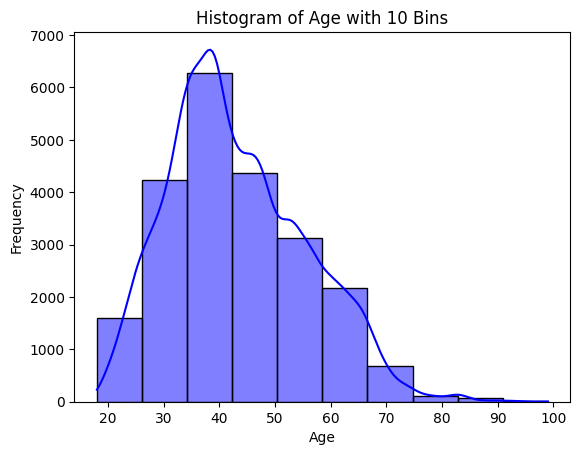

In [479]:
# Create the histogram with 10 bins
sns.histplot(data=df, x='Age', bins=10, kde=True, color="blue")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age with 10 Bins")

# Show the plot
plt.show()

Age of customer mostly distributed in the range of 30 to 60

"Rating" refers to Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this.

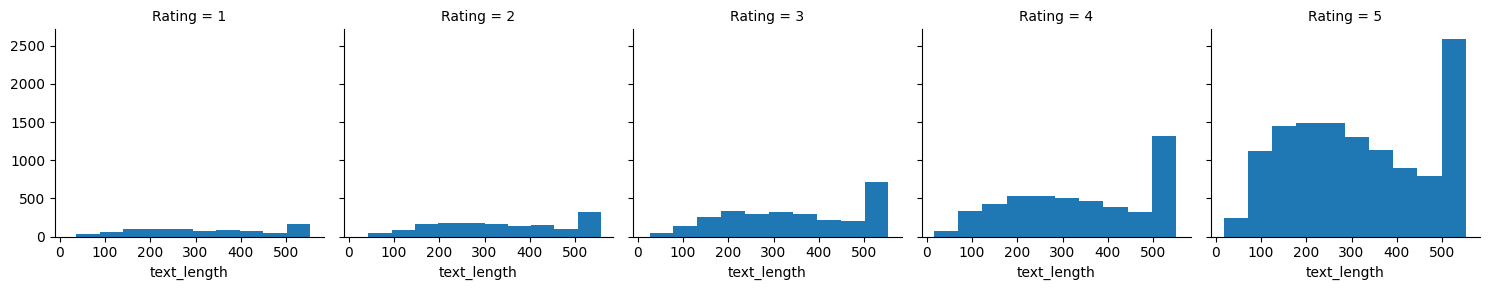

In [480]:
g = sns.FacetGrid(df,col='Rating',palette='viridis')
g.map(plt.hist,'text_length')

Creating a countplot of the number of occurrences for each type of ratings.

<Axes: xlabel='Rating', ylabel='count'>

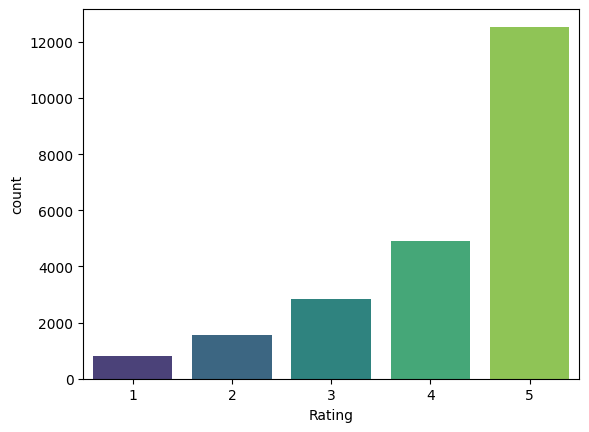

In [481]:
sns.countplot(x='Rating',data=df,palette='viridis')

In [482]:
# Create a pie chart for 'Rating'
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig1 = px.pie(rating_counts, names='Rating', values='Count', title='Pie Chart of Ratings')

# Create a pie chart for 'Recommended IND'
recommend_counts = df['Recommended IND'].value_counts().reset_index()
recommend_counts.columns = ['Recommended IND', 'Count']

fig2 = px.pie(recommend_counts, names='Recommended IND', values='Count', title='Pie Chart of Recommended ')

# Display the pie charts
fig1.show()
fig2.show()

1.Rating: Here, we can notice that 4 and 5 rates account about 77% of rating.

2.Recommended IND: About 81.9% products are recommended in the dataset.

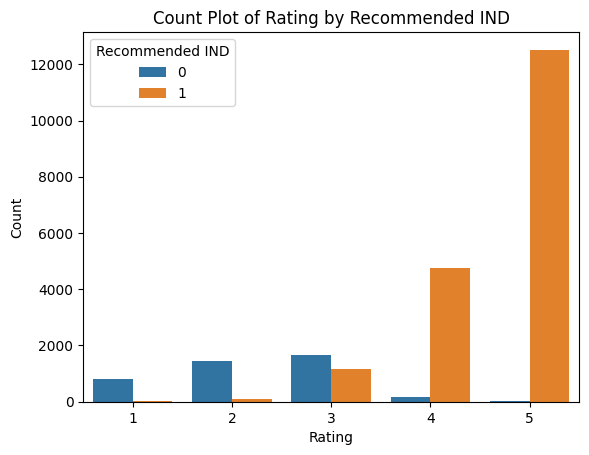

In [483]:
sns.countplot(data=df, x='Rating', hue='Recommended IND')

# Set labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count Plot of Rating by Recommended IND")

# Show the plot
plt.show()


clearly shows that good rating means product will be recommended



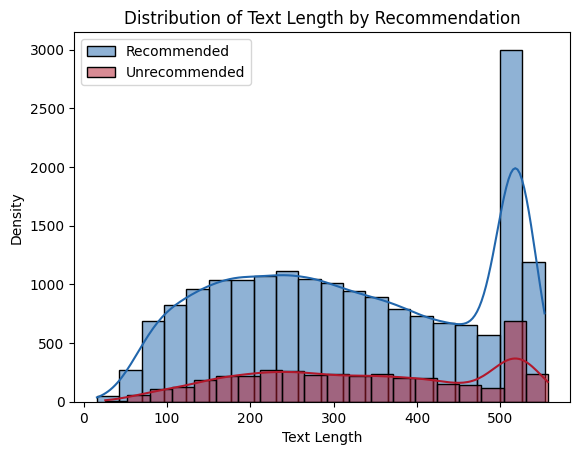

In [484]:
recommended = df[df['Recommended IND'] == 1]
recommended_n = df[df['Recommended IND']==0]

# Create distribution plots for text lengths
sns.histplot(recommended['text_length'], label='Recommended', color='#2166ac', kde=True, bins=20)
sns.histplot(recommended_n['text_length'], label='Unrecommended', color='#b2182b', kde=True, bins=20)

# Set labels and title
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.title("Distribution of Text Length by Recommendation")

# Add a legend
plt.legend()

# Show the plot
plt.show()

Text of recommended comments are dsitributed along with higher length relatively.

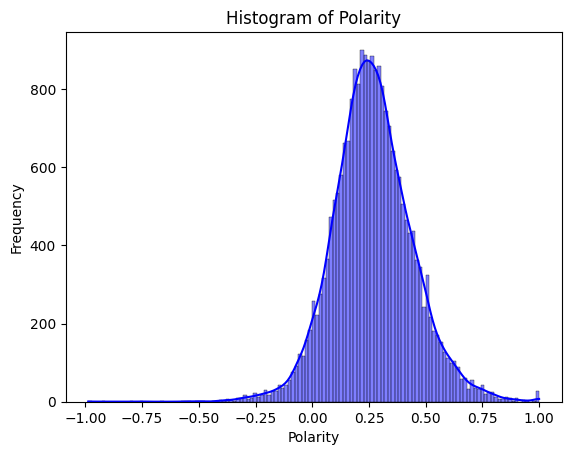

In [485]:
# Create the histogram with 10 bins
sns.histplot(data=df, x='Polarity', kde=True, color="blue")

# Add labels and title
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.title("Histogram of Polarity")

# Show the plot
plt.show()

We can see that there is a normal distribution centered around 0.175 polarity. Most of the reviews were positive, and a small fraction was negative. 

3 Categorical Columns in the dataset:

Department Name

Class Name

Division Name


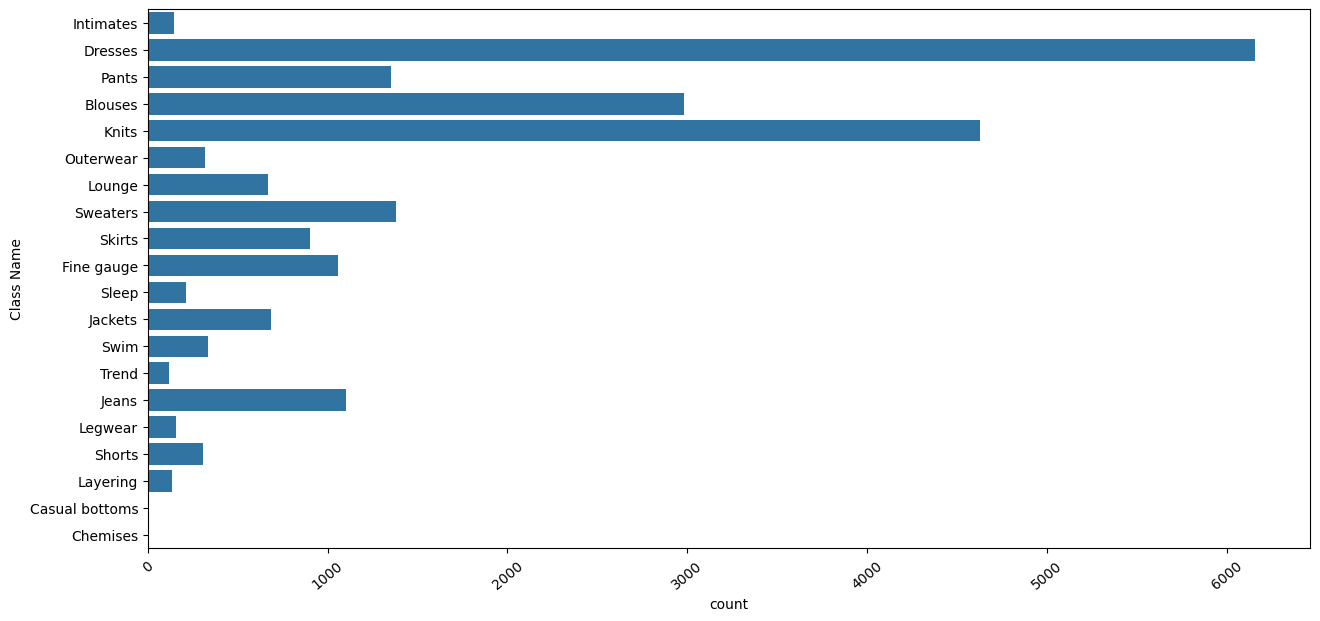

In [486]:
plt.figure(figsize = (15, 7))
sns.countplot(df['Class Name'])
plt.xticks(rotation = 40)
plt.show()

Dresses , Knits , Blouses are the most sold items

<Axes: ylabel='Rating'>

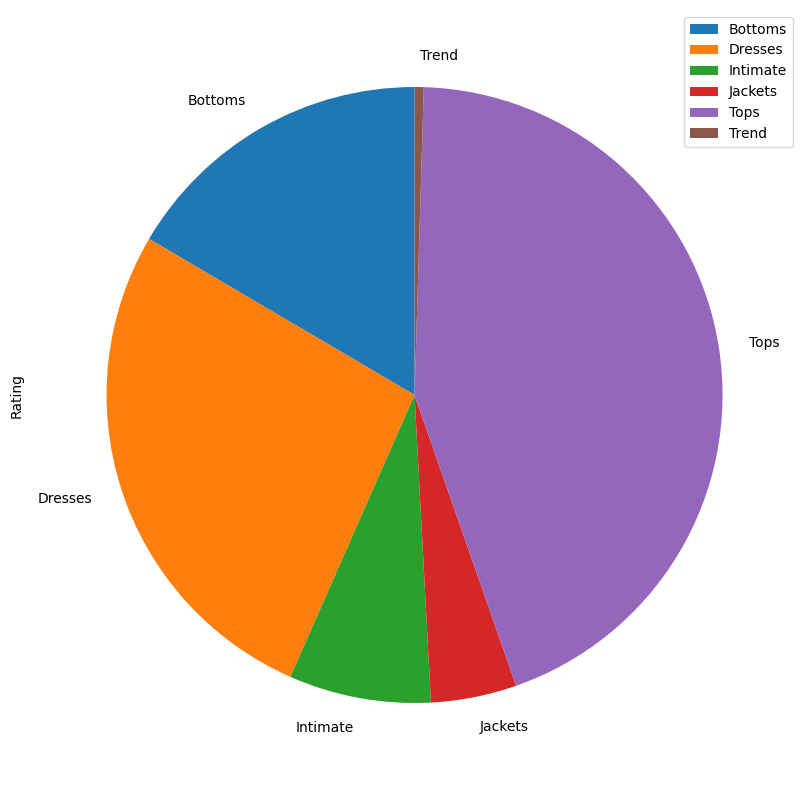

In [487]:
df.groupby(['Department Name']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(15,10), y='Rating')

we conclude that tops got the highest rating amongst all while trend have the lowest.


<Axes: xlabel='count', ylabel='Department Name'>

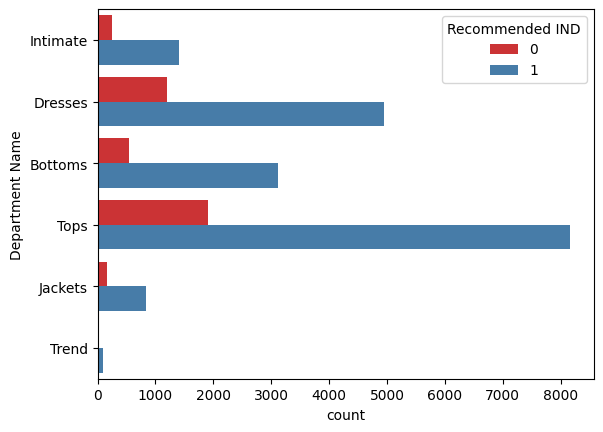

In [488]:
sns.countplot(data=df, y='Department Name', hue='Recommended IND' ,palette = "Set1")


The graph shows department-wise product recommendations, with "Tops" having the highest number of recommended items and "Dresses" having a notable count of non-recommended items.

<Axes: xlabel='count', ylabel='Division Name'>

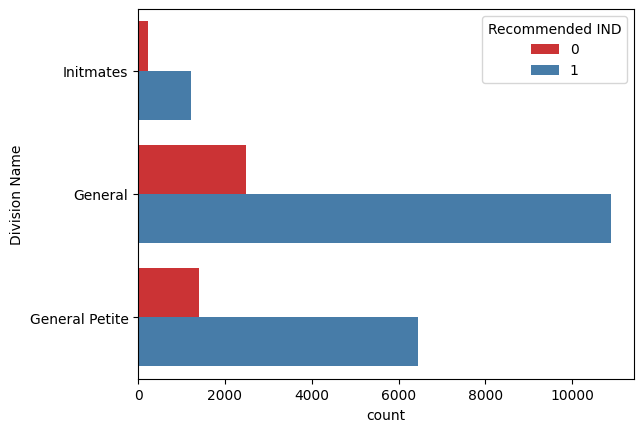

In [489]:
sns.countplot(data=df, y='Division Name', hue='Recommended IND', palette = "Set1")

The graph indicates that the 'General' division has the highest count of recommended items (1), while 'Intimates' has the lowest overall count of items.

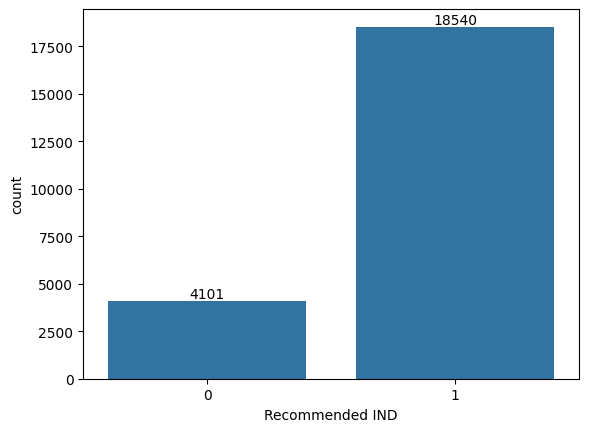

In [490]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

The classes in the data exhibit significant numerical imbalances, forming an imbalanced dataset.

Feature Selection 

In [491]:
df_rec = df[["Text", "Recommended IND"]]
df_rec.head()

,Text,Recommended IND
0,Else Absolutely wonderful - silky and sexy and...,1
1,Else Love this dress! it's sooo pretty. i ha...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


 Text Mining

Working With Textual Data 📝📝

Starting with creating word cloud:

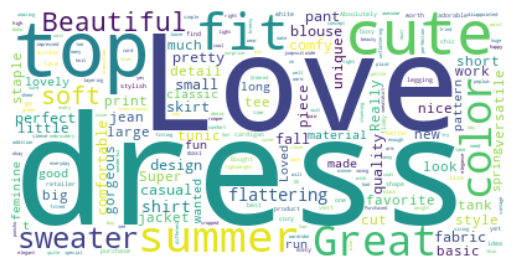

In [492]:
from wordcloud import WordCloud
text = " ".join(cat.split()[1] for cat in df_rec.Text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [493]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import re

In [494]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Step 1: Tokenization

Our first step is tokenization. This important task takes your long string of text and converts each word into a “token” or value and places them within a list. The list values are much easier to manipulate by later steps. We’ll create a reusable function to handle this for us.

In [495]:
from nltk.tokenize import word_tokenize
# Tokenize the text in the 'Text' column
df_rec['Text'] = df_rec['Text'].apply(word_tokenize)

In [496]:

# Remove special characters, punctuation from each tokenized list and convert to lowercase
df_rec['Text'] = df_rec['Text'].apply(lambda tokens: [re.sub(r'\W+', '', token).lower() for token in tokens if re.sub(r'\W+', '', token)])


Step2: Removing Stopwords:-


In the next step, we’re going to reduce the noise in our data by removing “stopwords”. These are special language-specific words that appear within a sentence that add little value to the meaning. Removing them helps the model see the words that matter. First, download the stopwords using the below command.

In [497]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df_rec['Text']=df_rec['Text'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step3: Stemming:-

The other useful text preprocessing technique we can apply is called “stemming”. This basically reduces each word down to its root, so “processing”, “processor”, and “process”, all become “process”. This is another way to remove noise and reduce the number of unique words in the text to help the model.

In [498]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Ensure NLTK's WordNet is downloaded
nltk.download('wordnet')

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    if isinstance(sentence, str):  # Check if the input is a string
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
    
        # Lemmatize each word and join them back into a sentence
        lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words])
    
        return lemmatized_sentence
    else:
        return sentence  # Return non-string values as is

# Apply lemmatization to the 'Text' column in your DataFrame (assuming the column is named 'Text')
df_rec['Text'] = df_rec['Text'].apply(lemmatize_sentence)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step4: Rejoin words:

The final step is to take our last list of tokens and rejoin them back into a string so we can pass it to a vectorizer. This is dead easy. We just pass the tokenized_column (which will be porter_stemmed for us) and use join() to join the words into a string, placing a space between each word.

In [499]:
df_rec['Text'] = df_rec['Text'].apply(lambda tokens: ' '.join(tokens))

In [500]:
df_rec.head()

,Text,Recommended IND
0,else absolutely wonderful silky sexy comfortable,1
1,else love dress sooo pretty happened find stor...,1
2,major design flaws high hopes dress really wan...,0
3,favorite buy love love love jumpsuit fun flirt...,1
4,flattering shirt shirt flattering due adjustab...,1


In [501]:
positive_sentences = df_rec[df_rec["Recommended IND"] == 1]["Text"]
positive_sentences

0         else absolutely wonderful silky sexy comfortable
1        else love dress sooo pretty happened find stor...
3        favorite buy love love love jumpsuit fun flirt...
4        flattering shirt shirt flattering due adjustab...
6        cagrcoal shimmer fun aded basket hte last mint...
                               ...                        
23479    fun piece nt sure ordering skirt could nt see ...
23481    great dress many occasions happy snag dress gr...
23482    wish made cotton reminds maternity clothes sof...
23484    cute dress perfect summer parties bought dress...
23485    please make like one dress lovely platinum fem...
Name: Text, Length: 18540, dtype: object

In [502]:
negative_sentences = df_rec[df_rec["Recommended IND"] == 0]["Text"]
negative_sentences

2        major design flaws high hopes dress really wan...
5        petite love tracy reese dresses one petite 5 f...
10       dress looks like made cheap material dress run...
22       looks like first pullover styling side zipper ...
25       falls flat loved material didnt really look lo...
                               ...                        
23449    tried color really pretty fun donset want pair...
23450    else wanted love jacket soft great color unfor...
23460    high hopes purchased good price typically love...
23478    unflattering surprised positive reviews produc...
23483    cute see fit well top see never would worked g...
Name: Text, Length: 4101, dtype: object

In [503]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'else absolutely wonderful silky sexy comfortable else love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 5 8 love length hits little knee would definitely true midi someone truly petite favorite buy love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments flattering shirt shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt cagrcoal shimmer fun aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants 3 skirts waas trying kept oops shimmer surprisingly goes lots ordered carbon store pick ton stuff always try used top pair skirts pants everything went color really nice charcoal shimmer went well pencil skirts flare pants etc compaint b

In [504]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'major design flaws high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c petite love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress looks like made cheap material dress runs small esp zipper area runs ordered sp typically fits tight material top looks feels cheap even pulling cause rip fabric pretty disappointed going christmas dress year needless say going back looks like first pullover styling side zipper would nt purchased knew side zipper large bust side zippers next impossible second tulle feels looks cheap slip awk

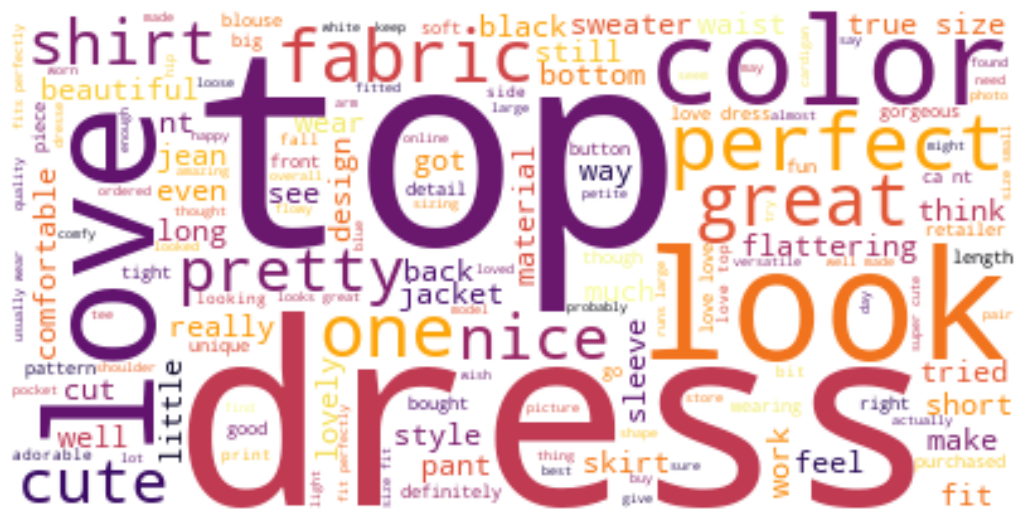

In [505]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_positive.generate(positive_words)
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

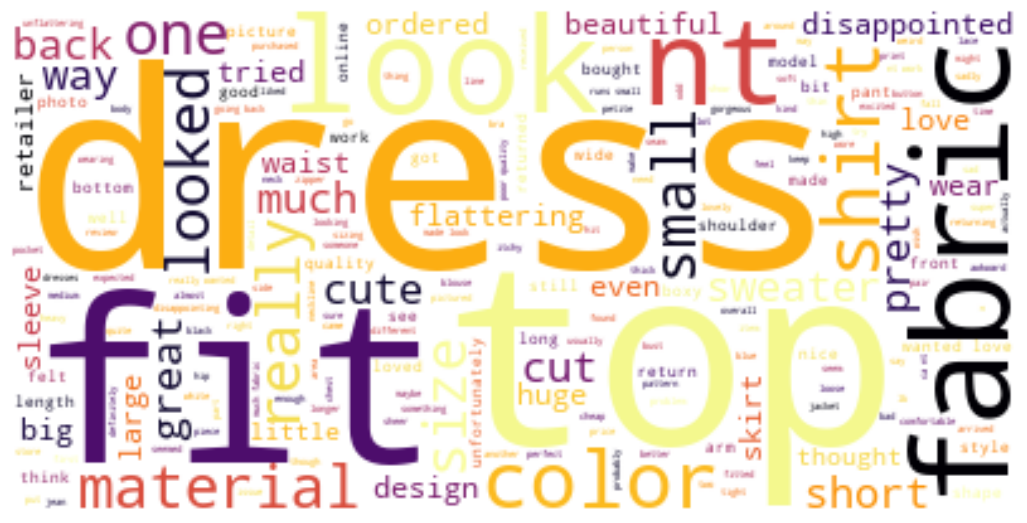

In [506]:
wordcloud_negative = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [507]:
X = df_rec.drop(columns=['Recommended IND'])  # Features (excluding the target variable)
y = df_rec['Recommended IND']  # Target variable


In [508]:
X

,Text
0,else absolutely wonderful silky sexy comfortable
1,else love dress sooo pretty happened find stor...
2,major design flaws high hopes dress really wan...
3,favorite buy love love love jumpsuit fun flirt...
4,flattering shirt shirt flattering due adjustab...
...,...
23481,great dress many occasions happy snag dress gr...
23482,wish made cotton reminds maternity clothes sof...
23483,cute see fit well top see never would worked g...
23484,cute dress perfect summer parties bought dress...


In [509]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [510]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [511]:
X_train_tf_idf.toarray()


array([[1.]])